# Mini Project #1: Baseball Analytics

The overall purpose of this mini-project is to predicting MLB wins per season by modeling data to KMeans clustering model and linear regression models.

## Part 3: Analysis/Modeling

In this part of the project, you are going to conduct actual analysis on the data your just processed in Part 1 & 2. The tasks in the part include:
- K-means Clustering: pre-modeling part that provides insights toward the data;
- Linear Regression: predict Wins (continuous) using trained linear regression model;
- Logistic Regression: predict Win_bins (categorical) using trained logistic regression model __on your own__.

Let's get started.

In [3]:
# import dependencies
import pandas as pd
import numpy as np

In [4]:
# read-in required data
# features for analysis
data_features = pd.read_csv('../baseball_analytics_features.csv', header=0, index_col=0)

# continuous target `wins`
wins = pd.read_csv('../baseball_analytics_wins.csv',  index_col=0, names = ['wins'])

# categorical target `Win_bins`
win_bins = pd.read_csv('../baseball_analytics_target.csv',  index_col=0, names = ['win_bins'])

# display if data are read correctly
print(data_features.head())
print(wins.head())
print(win_bins.head())

     G    R    AB     H   2B  3B   HR   BB      SO   SB      ...        \
0  162  744  5424  1331  218  22  189  681  1068.0   37      ...         
1  162  718  5499  1377  232  35  137  602   917.0   46      ...         
2  161  597  5506  1378  208  38   95  448   916.0   43      ...         
3  162  544  5362  1297  186  27  102  472   920.0   49      ...         
4  162  527  5354  1279  200  36   92  443   973.0  107      ...         

   decade_1940  decade_1950  decade_1960  decade_1970  decade_1980  \
0            0            0            1            0            0   
1            0            0            1            0            0   
2            0            0            1            0            0   
3            0            0            1            0            0   
4            0            0            1            0            0   

   decade_1990  decade_2000  decade_2010  RA_per_game  runs_per_game  
0            0            0            0     4.839506       4.5

### K-means Clustering

K-means clustering, as a basic clustering technique, can capture internal relationship(s) between your data points. Sometimes we use (k-means) clustering as a pre-modeling step for supervised learning: essentially, we can use k-means clsutering to capture the internal relationship of the features, and then capture the relationship in an additional feature that being used as an input to a classification/regression model.

One key step in k-means clustering is to determine the value of `k` - how many clusters? If we want to use the clustering results as an additional (categorical) feature, we should not have a higher value of `k`. Also, increasing value of `k` may increase the erroneous relationship being captured. The k-means model is provided in `sklearn.clustering`.

In this tutorial, we use **Grid Search** to find the best value of `k`. To conduct Grid Search, you need a range of `k` and a metric that measures the performance under each value of `k`. In this context, we select the metric as the [**silhouette score**](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) (`s_score`), which is provided in `sklearn.metrics`.

In [5]:
# import dependencies
from sklearn.cluster import KMeans
from sklearn import metrics

Silhouette score is a visualized way of measuring the performance of clustering. Thus, we need to import `matplotlib` to visualize the clustering.

In [6]:
# import and initialize matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

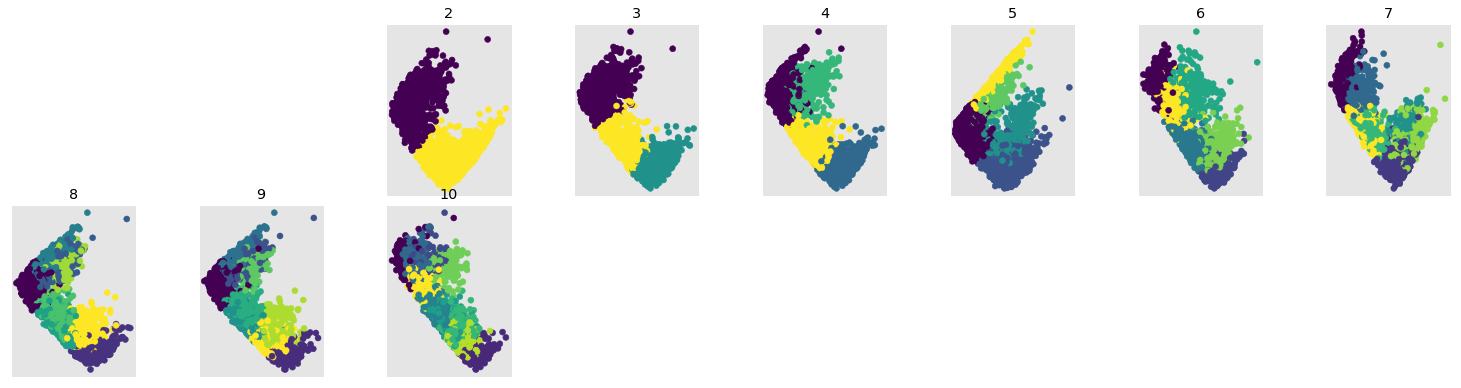

In [9]:
# We need to create a figure that contains different value of `k` as sub-figures
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.5)

#### complete your code below
#### create an empty dictionary `s_score_dict` that we will use to store silhouette scores
#### for different `k` values; use different `k` values as keys, and corresponding
#### silhouette score as values
s_score_dict = {}

#### now we create a for-loop go through a range of `k` values in [2, 11]
for i in range(2,11):
    #### add a sub-figure `ax` to `fig` using `.add_subplot(8,8,i+1,xticks=[],yticks=[])`
    ax = fig.add_subplot(8,8,i+1,xticks=[],yticks=[])
    #fig.add_subplot(8,8,i+1,xticks=[],yticks=[])
    # conduct the k-means clustering using `k = i`
    km = KMeans(n_clusters=i, random_state=2019)
    # any clustering model needs a distance metric, in this case, `distance` is the distance between
    # any pair of data points
    distances = km.fit_transform(data_features)
    # clustering models will generate `labels` - if you want to create the additional feature 
    # as discussed above, you will use `labels` as its values
    labels = km.labels_
    # you will then applied the fitted `km` model to `data_faetures`
    l= km.fit_predict(data_features)
    # Silhouette score is computed between `data_features` and `l`
    s_s= metrics.silhouette_score(data_features, l)
    #### update the `s_score_dict` using `i` as key and `s_s` as value
    s_score_dict = {i:s_s}
    # we will plot the clusters out using scatter plot
    plt.scatter(distances[:,0], distances[:,1], c=labels)
    #### add 'i clusters' as the title of each sub-figure
    plt.title(i)
    
#### show plot
plt.show()

Visually, we know that 2-clusters looks the best. Let's double check the silhouette score to make sure.

In [10]:
s_score_dict

{10: 0.1716941484123346}

As observed in the figure, 2-cluster model returns the highest silhouette score. 

__Rule of thumb__: However, we normally start searching for `k` value at `3`.

So we are going to build a k-means model of `k=3`, and then add the `cluster_label` as a feature.

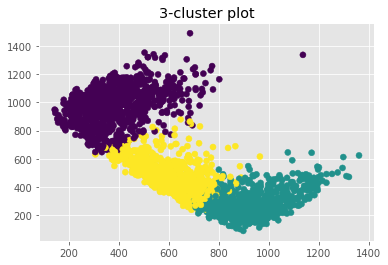

In [11]:
#### complete your code below
#### create a model called `kmeans_model` with `n_clusters = 3` and `random_state = 2019`
kmeans_model = KMeans(n_clusters=3, random_state=2019)

#### capture `distances` by fit (`fit_transform`) `kmeans_model` to `data_features`
distances = kmeans_model.fit_transform(data_features)

#### record labels of clusters in `labels`
labels = kmeans_model.labels_

#### create a scatter plot (plt.scatter()) to plot the clusters
plt.scatter(distances[:,0], distances[:,1], c=labels)

#### add title to plot as `3-cluster plot`
plt.title("3-cluster plot")

#### show the plot
plt.show()

Looks pretty good, correct? Now let's add the `labels` to `data_features` as an additional feature so that we can use it in further analysis.

In [12]:
# look at `labels`
print(labels)
print(len(labels))
print(data_features.shape[0])

[1 2 2 ... 1 1 1]
2287
2287


In [13]:
#### complete your code below
#### add `labels` to `data_features`
#### add `labels` as a column in `data_features` namely `label`
data_features['label'] = labels

#### double check by looking at the first 5 rows of `data_features`
data_features.head(5)

,G,R,AB,H,2B,3B,HR,BB,SO,SB,...,decade_1950,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010,RA_per_game,runs_per_game,label
0,162,744,5424,1331,218,22,189,681,1068.0,37,...,0,1,0,0,0,0,0,4.839506,4.592593,1
1,162,718,5499,1377,232,35,137,602,917.0,46,...,0,1,0,0,0,0,0,4.358025,4.432099,2
2,161,597,5506,1378,208,38,95,448,916.0,43,...,0,1,0,0,0,0,0,4.099379,3.708075,2
3,162,544,5362,1297,186,27,102,472,920.0,49,...,0,1,0,0,0,0,0,3.401235,3.358025,2
4,162,527,5354,1279,200,36,92,443,973.0,107,...,0,1,0,0,0,0,0,3.512346,3.253086,2


### Linear Regression

We will train linear regression models to predict a continuous target `wins`.

In [14]:
#### complete your code below
#### first we need to create the dataset we will use for the regression model
#### `reg_data` = `data_features` + `wins`
reg_data = data_features
reg_data['wins'] = wins

#### double check by looking at the first 5 rows of `reg_data`
reg_data.head(5)

,G,R,AB,H,2B,3B,HR,BB,SO,SB,...,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010,RA_per_game,runs_per_game,label,wins
0,162,744,5424,1331,218,22,189,681,1068.0,37,...,1,0,0,0,0,0,4.839506,4.592593,1,70
1,162,718,5499,1377,232,35,137,602,917.0,46,...,1,0,0,0,0,0,4.358025,4.432099,2,86
2,161,597,5506,1378,208,38,95,448,916.0,43,...,1,0,0,0,0,0,4.099379,3.708075,2,70
3,162,544,5362,1297,186,27,102,472,920.0,49,...,1,0,0,0,0,0,3.401235,3.358025,2,82
4,162,527,5354,1279,200,36,92,443,973.0,107,...,1,0,0,0,0,0,3.512346,3.253086,2,75


In [15]:
#### complete your code below
#### investigate descriptive stats using describe()
reg_data.describe()

,G,R,AB,H,2B,3B,HR,BB,SO,SB,...,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010,RA_per_game,runs_per_game,label,wins
count,2287.000000,2287.000000,2287.000000,2287.000000,2287.000000,2287.000000,2287.000000,2287.000000,2287.000000,2287.000000,...,2287.000000,2287.000000,2287.000000,2287.000000,2287.000000,2287.000000,2287.000000,2287.000000,2287.000000,2287.000000
mean,158.959773,700.365982,5414.390031,1414.773502,244.439440,44.781373,117.527766,513.138610,830.057280,99.382597,...,0.086576,0.107564,0.102317,0.097070,0.131176,0.091823,4.402544,4.406552,0.956275,79.230433
std,3.764287,102.720336,172.157391,106.132452,45.846798,19.980028,56.047068,83.985826,251.453012,52.594764,...,0.281275,0.309897,0.303132,0.296118,0.337667,0.288840,0.652200,0.646306,0.841204,13.045240
min,150.000000,371.000000,4768.000000,1044.000000,110.000000,6.000000,3.000000,282.000000,262.000000,13.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.458065,2.409091,0.000000,36.000000
25%,155.000000,634.000000,5297.500000,1348.000000,212.000000,30.000000,79.000000,457.000000,609.000000,61.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.962963,3.975309,0.000000,70.000000
50%,162.000000,698.000000,5457.000000,1413.000000,245.000000,40.000000,122.000000,510.000000,855.000000,89.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.364198,4.388158,1.000000,80.000000
75%,162.000000,765.000000,5538.000000,1486.500000,278.000000,55.500000,158.000000,568.000000,1012.500000,128.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.806918,4.794290,2.000000,89.000000
max,165.000000,1067.000000,5781.000000,1783.000000,376.000000,129.000000,264.000000,835.000000,1543.000000,409.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.685897,6.896104,2.000000,116.000000


Let's import the dependencies for building and evaluation a linear regression model.

In [16]:
# Import `LinearRegression` from `sklearn.linear_model`
from sklearn.linear_model import LinearRegression

# Import `mean_absolute_error` from `sklearn.metrics`
from sklearn.metrics import mean_absolute_error

Then let's define the features and target. There are two ways of doing this. Let's try the first.

In [48]:
#### complete your code below
#### create a variable `reg_values` which are the values in `reg_data`
reg_values = reg_data.values

#### create a variable `X` which contains all columns in `reg_values` besides the last 
X = reg_data.drop('wins',1)

#### create a variable `y` which contains the last column in `reg_values`
y = reg_data.wins

Here is an alternative method:

In [49]:
#### complete your code below
#### create a variable `Xa` which contains all values in `data_features`
Xa = data_features

#### create a variable `ya` which contains values in `wins`
ya = wins

Now we need to split our data into training (`X_train`, `y_train`) and testing (`X_test`, `y_test`).

In [50]:
#### complete your code below
#### import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

#### split X, y into training and testing, using 75/25 split, and set `random_state = 2019`
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2019)

In [51]:
# Create Linear Regression model, fit model, and make predictions
lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [52]:
# calculate the MAE
mae = mean_absolute_error(y_test, y_pred)

# Print `mae`
print(mae)

2.8570477884172925


You can print your linear regression model.

In [53]:
lr.coef_

array([-2.94333646e-01,  9.96848705e-02, -3.02864226e-02,  2.41885519e-02,
       -2.31799393e-03,  3.80599479e-03,  5.20138465e-04, -3.88328168e-03,
       -4.08780326e-05, -3.88681946e-03, -5.32569297e-03, -5.56495201e-02,
        8.12877715e+00,  1.17044267e-01,  1.61581644e-01,  3.10865535e-01,
        5.16034773e-02, -6.68409434e-03, -4.60205019e-03, -7.75555409e-03,
        1.47830779e-03, -5.22384650e-02,  8.56984829e-03, -2.94117609e+02,
       -2.91377045e+00, -2.06552634e+00,  1.45082234e+00,  1.68362376e+00,
        6.17853512e-01,  1.01569597e-01,  1.56876639e-01, -1.83052338e-01,
       -2.93616138e-01,  8.92155411e-01,  1.17354655e+00, -8.07296374e+00,
       -1.47663835e+00, -1.31628306e-01])

In [54]:
lr.intercept_

308.2929459248404

We can try to train an advanced regression model to see if there is any improvement in results.

In [55]:
# Import `RidgeCV` from `sklearn.linear_model`
from sklearn.linear_model import RidgeCV

# Create Ridge Linear Regression model, fit model, and make predictions
rrm = RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0), normalize=True)
rrm.fit(X_train, y_train)
predictions_rrm = rrm.predict(X_test)

# Determine mean absolute error
mae_rrm = mean_absolute_error(y_test, predictions_rrm)
print(mae_rrm)

2.8650736288477163


We can also see how much contribution the `label` feature provides to the regression model.

In [62]:
#### Complete your code below
#### create a variable `Xb` without `label`
#### you can do it by getting X[:,:-1]
Xb = X.iloc[:,:-1]
#### create your training and testing data using Xb and y
#### remember that Xb does not contain 'label', use the same parameters as before
#### 75/25 split, and `random_state = 2019`
X_train, X_test, y_train, y_test = train_test_split(Xb, y, test_size=0.25, random_state=2019)

#### Create Linear Regression model, fit model, and make predictions
lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

#### calculate the MAE
mae = mean_absolute_error(y_test, y_pred)

#### Print `mae`
print(mae)



2.8552821703052715


### Question: 
__Do you observe an improvement or not while excluding `label` in the analysis? In other words, does `label` help with the analysis? Answer in the next block__.

There is a not lot of change in my numbers. Without the label my MAE is lower. The change is so small its is negligible. 

### Logistic Regression

You will need to create a logistic regression model __on your own__, using `data_features` as features, and `win_bins` as the target.

If you have any question, refer to the logistic regression notebook for more help.

In [63]:
# Import `LinearRegression` from `sklearn.linear_model`
from sklearn.linear_model import LogisticRegression

In [64]:
## creating the Logistic Regression model
logreg = LogisticRegression()

## fitting the model with data
logreg.fit(X_train, y_train)

## creating a prediction variable
y_pred = logreg.predict(X_test)